# Analysis of Extracted Data

### Importing the CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tweet_df=pd.read_csv('twitter_data.csv')

In [3]:
tweet_df.head()

,Unnamed: 0,UserID,Name,Tweet,Mentions,Created At,Retweet,Likes,Location
0,0,5125_uttam,UTTAM SALUNKE,@VanchitRuttank: #HarGharTiranga \nहा राष्ट्री...,"['वंचित वृत्तांक अधिकृत', 'Prakash Ambedkar']",2022-09-02 19:00:51+00:00,1,0,NaN
1,1,Sangeeta_IND92,Sangeeta Tiwari,@AbhishektiBJP: #HarGharTiranga ....तिरंगा हमा...,['Abhishek Tiwari'],2022-09-02 18:57:07+00:00,1,0,NaN
2,2,profpicturebot,Bot,"@AbhishektiBJP: #NewProfilePic\n""तिरंगा हमें ज...",['Abhishek Tiwari'],2022-09-02 18:57:04+00:00,1,0,location
3,3,Sangeeta_IND92,Sangeeta Tiwari,"@AbhishektiBJP: #NewProfilePic\n""तिरंगा हमें ज...",['Abhishek Tiwari'],2022-09-02 18:57:01+00:00,1,0,NaN
4,4,Sangeeta_IND92,Sangeeta Tiwari,@AbhishektiBJP: भारत के राष्ट्रीय ध्वज के रचना...,['Abhishek Tiwari'],2022-09-02 18:56:50+00:00,1,0,NaN


In [141]:
#tweet_df["Mentions"]=tweet_df["Mentions"].apply(lambda d: d[1:-1])

In [4]:
tweet_df.shape

(35947, 9)

In [5]:
max(tweet_df["Likes"].values)

4945

In [6]:
tweet_df["UserID"].value_counts()

BaramullaNyk       1535
YuvaGurdaspur      1215
NYKAnantnag         886
Andhravilasnews     752
nyk_budgam          550
                   ... 
sandeep30766558       1
Aaaaaaa48043398       1
onlyiffat             1
rpfpchgyd             1
BharatPhonde5         1
Name: UserID, Length: 12253, dtype: int64

In [7]:
top_mentions=tweet_df["Mentions"].value_counts()[:10]
top_mentions

['Narendra Modi']                     2609
['NYKS India']                        1932
[]                                    1672
['Dera Sacha Sauda']                   901
['Amrit Mahotsav']                     814
['Pawan Kalyan', 'Amrit Mahotsav']     489
['SMG Haryana']                        448
['Mahesh Babu']                        432
['Bhāratvarṣam']                       399
['Blue Chip']                          365
Name: Mentions, dtype: int64

In [8]:
tweet_df["Retweet"].value_counts()

1    33680
0     2267
Name: Retweet, dtype: int64

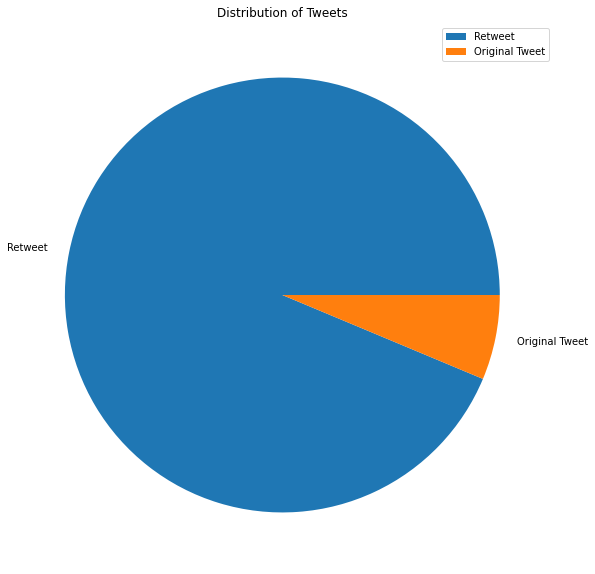

In [10]:
plt.figure(figsize=(10,10))
plt.pie(np.array(tweet_df["Retweet"].value_counts()),labels=["Retweet","Original Tweet"])
plt.legend()
plt.title("Distribution of Tweets")
plt.savefig("TweetDist.png")
plt.show()

In [147]:
topUsers=tweet_df["UserID"].value_counts()[:10]
topUsers

BaramullaNyk       1535
YuvaGurdaspur      1215
NYKAnantnag         886
Andhravilasnews     752
nyk_budgam          550
RahulVerma1971      504
nyks_doda           488
therkmalviya        473
nykkinnaur          399
JammuNehru          363
Name: UserID, dtype: int64

### Visualizing Data

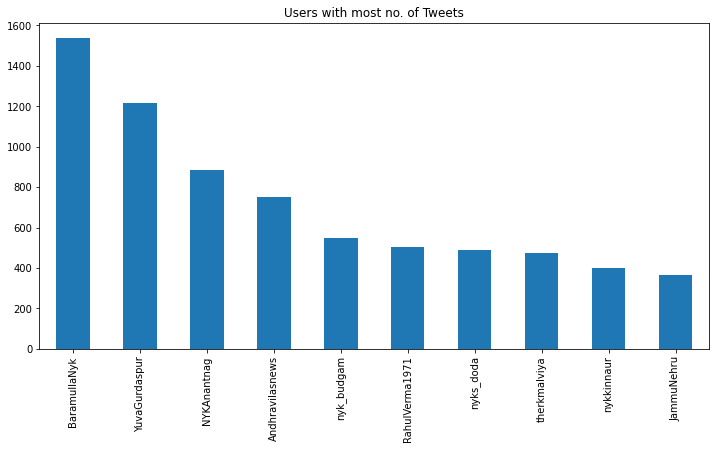

In [148]:
plt.figure(figsize=(12,6))
topUsers.plot.bar();
plt.title("Users with most no. of Tweets")
plt.show()

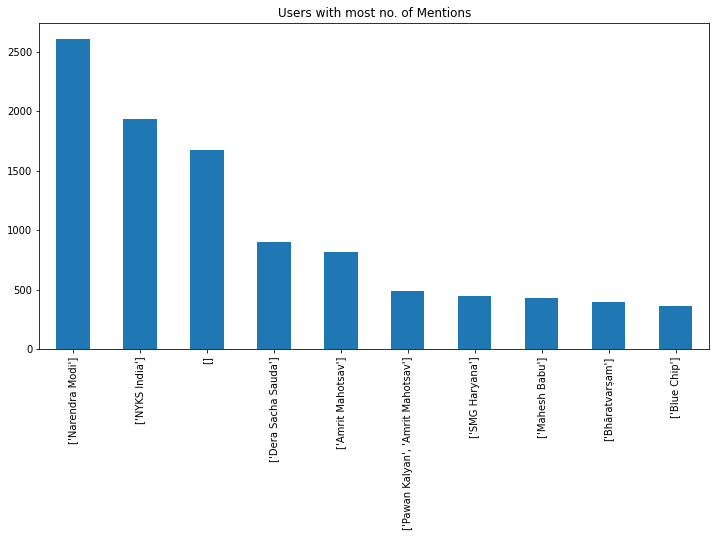

In [149]:
plt.figure(figsize=(12,6))
top_mentions.plot.bar();
plt.title("Users with most no. of Mentions")
plt.show()

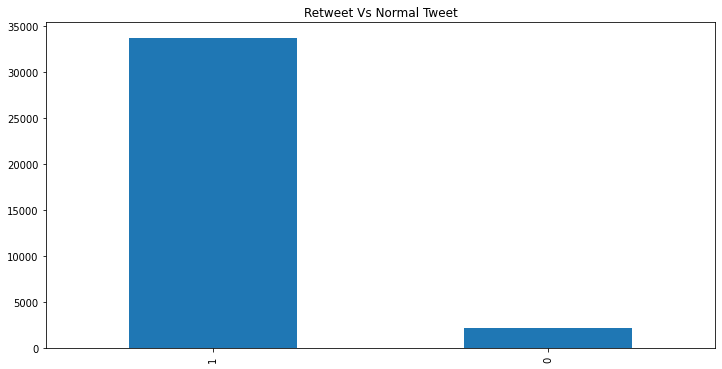

In [150]:
rtVsT=tweet_df["Retweet"].value_counts()
plt.figure(figsize=(12,6))
rtVsT.plot.bar();
plt.title("Retweet Vs Normal Tweet")
plt.show()

## Translating

In [151]:
from googletrans import Translator

In [152]:
translator=Translator()

In [153]:
from deep_translator import GoogleTranslator

In [154]:
GoogleTranslator(source='auto', target='en').translate("keep it up, you are awesome")

'keep it up, you are awesome'

In [155]:
translated_tweets=[]

In [156]:
tweets_text=np.array(tweet_df["Tweet"])
len(tweets_text)

35947

In [157]:
from translate import Translator

In [158]:
translator= Translator(to_lang="en")

In [159]:
%%time
for i in range(len(tweets_text)):
    translated=translator.translate(tweets_text[i])
    translated_tweets.append(translated)

Wall time: 20 ms


In [160]:
len(translated_tweets)

35947

In [161]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [162]:
sentiments=[]
for i in range(len(translated_tweets)):
    sent=sentiment.polarity_scores(translated_tweets[i])
    if sent["compound"]>=0.05:
        res="Positive"
    elif sent["compound"]<=-0.05:
        res="Negative"
    else:
        res="Neutral"
    sentiments.append(res)

In [163]:
labels,values=np.unique(sentiments,return_counts=True)

In [164]:
labels

array(['Negative', 'Neutral', 'Positive'], dtype='<U8')

In [165]:
values

array([ 1978, 22879, 11090], dtype=int64)

In [166]:
new_labels=[]
for i in range(len(labels)):
    pct=values[i]/len(translated_tweets)
    pct*=100
    new_labels.append(f'{labels[i]} - {str(round(pct,2))}%')
    print(labels[i])

Negative
Neutral
Positive


In [167]:
new_labels

['Negative - 5.5%', 'Neutral - 63.65%', 'Positive - 30.85%']

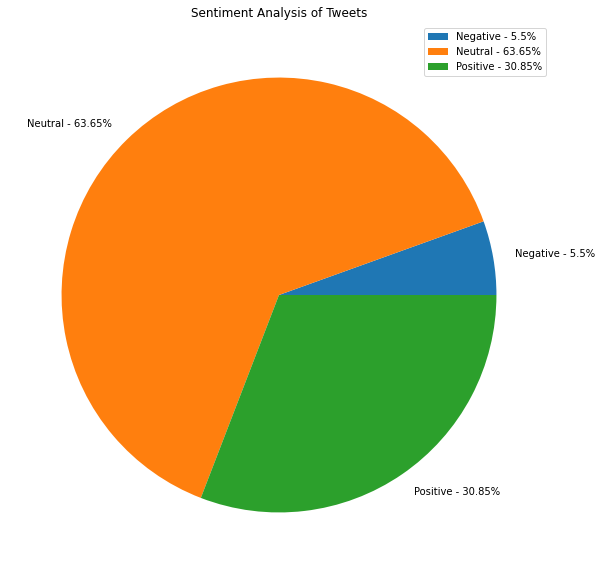

In [260]:
plt.figure(figsize=(10,10))
plt.pie(values,labels=new_labels)
plt.legend()
plt.title("Sentiment Analysis of Tweets")
plt.savefig("SentimentAnalysis.png")
plt.show()

### Using NetworkX

In [169]:
import networkx as nx

In [170]:
G = nx.Graph()

In [171]:
NODES=list(set(tweet_df["UserID"]))
len(NODES)

12253

In [172]:
G.add_nodes_from(NODES)

In [173]:
tweet_df.iloc[0]["Mentions"][1:-1].split(',')[0][1:-1]

'वंचित वृत्तांक अधिकृत'

In [174]:


EDGES=[]

for i in range(tweet_df.shape[0]):
    temp_edges=[]
    tweeted_user=tweet_df.iloc[i]["UserID"]
    mentions=tweet_df.iloc[i]["Mentions"][1:-1].split(',')
    for m in mentions:
        temp_edges.append((tweeted_user,m[1:-1]))
    EDGES.extend(temp_edges)



In [175]:
G.add_edges_from(EDGES)

In [176]:
len(G.edges)

25550

## Metrics

### Closeness Centrality

In [177]:
closeness_centrality=nx.closeness_centrality(G)

In [178]:
sorted_cc = sorted(closeness_centrality.items(), key = lambda kv: kv[1],reverse=True)

In [179]:
sorted_cc[:10]

[('Narendra Modi', 0.24997409813787205),
 ('RahulVerma1971', 0.24691931307635356),
 ('nyk_budgam', 0.23435469564049696),
 ("'Narendra Modi", 0.22440592059834333),
 ('nyks_doda', 0.22155725712828334),
 ('YuvaSbs', 0.21981089349643382),
 ('therkmalviya', 0.2171095757343814),
 ('Nykuttarkashi', 0.2153178006166518),
 ('rdnss_kolkata', 0.21529948271281776),
 ("'Amrit Mahotsav", 0.21434215038094492)]

In [180]:
def plot_metrics_bar(metrics,title):
    x_val = [x[0] for x in metrics[:10]]
    y_val = [x[1] for x in metrics[:10]]
    plt.figure(figsize=(10,6))
    plt.bar(x_val,y_val)
    plt.xticks(rotation=45)
    plt.title(title);
    plt.savefig(f'plot_of_{title}.png')

In [228]:
new_scc=sorted_cc[:11]
new_scc.append((new_scc[0][0],new_scc[0][1]+new_scc[3][1]))
del new_scc[0]
del new_scc[2]
new_scc = sorted(new_scc, key = lambda kv: kv[1],reverse=True)
new_scc

[('Narendra Modi', 0.4743800187362154),
 ('RahulVerma1971', 0.24691931307635356),
 ('nyk_budgam', 0.23435469564049696),
 ('nyks_doda', 0.22155725712828334),
 ('YuvaSbs', 0.21981089349643382),
 ('therkmalviya', 0.2171095757343814),
 ('Nykuttarkashi', 0.2153178006166518),
 ('rdnss_kolkata', 0.21529948271281776),
 ("'Amrit Mahotsav", 0.21434215038094492),
 ('nykspoonch', 0.21431038590433504)]

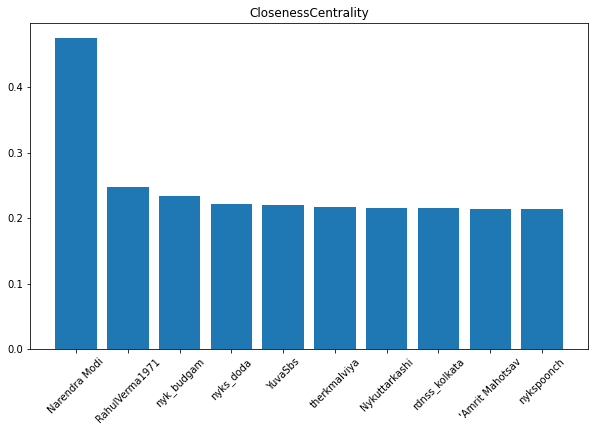

In [229]:
plot_metrics_bar(new_scc,"ClosenessCentrality")

### Number of nodes and edges

In [182]:
nodes_list=G.nodes
len(nodes_list)

16742

In [183]:
edges_list=G.edges
len(edges_list)

25550

### Degree

In [184]:
degree=sorted(nx.degree(G),key=lambda x:x[1],reverse=True)
degree[0:10]

[('Narendra Modi', 1870),
 ("'Narendra Modi", 492),
 ('', 454),
 ('SMG Haryana', 404),
 ('Bhāratvarṣam', 398),
 ("'Amrit Mahotsav", 385),
 ('Pawan Kalyan', 353),
 ("'Jay Shah", 316),
 ('Mahesh Babu', 315),
 ('Amrit Mahotsav', 308)]

In [238]:
new_deg=degree[:20]
new_deg.append((new_deg[0][0],new_deg[0][1]+new_deg[1][1]))
new_deg.append((new_deg[9][0],new_deg[5][1]+new_deg[9][1]))
new_deg

[('Narendra Modi', 1870),
 ("'Narendra Modi", 492),
 ('', 454),
 ('SMG Haryana', 404),
 ('Bhāratvarṣam', 398),
 ("'Amrit Mahotsav", 385),
 ('Pawan Kalyan', 353),
 ("'Jay Shah", 316),
 ('Mahesh Babu', 315),
 ('Amrit Mahotsav', 308),
 ('இசை', 304),
 ('Flag Foundation of India', 288),
 ("'BJP Bengal", 276),
 ('Suvendu Adhikari • শুভেন্দু অধিকারী', 274),
 ('NORTHERN COMMAND - INDIAN ARMY', 270),
 ("'Amit Shah", 231),
 ("'NYKS India", 225),
 ('YuvaGurdaspur', 222),
 ('Dera Sacha Sauda', 217),
 ('RahulVerma1971', 210),
 ('Narendra Modi', 2362),
 ('Amrit Mahotsav', 693)]

In [239]:
del new_deg[0]
del new_deg[0]
del new_deg[0]
del new_deg[2]
del new_deg[5]
new_deg=sorted(new_deg,key=lambda x:x[1],reverse=True)
new_deg[0:10]

[('Narendra Modi', 2362),
 ('Amrit Mahotsav', 693),
 ('SMG Haryana', 404),
 ('Bhāratvarṣam', 398),
 ('Pawan Kalyan', 353),
 ("'Jay Shah", 316),
 ('Mahesh Babu', 315),
 ('இசை', 304),
 ('Flag Foundation of India', 288),
 ("'BJP Bengal", 276)]

C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2951 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2970 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Gly

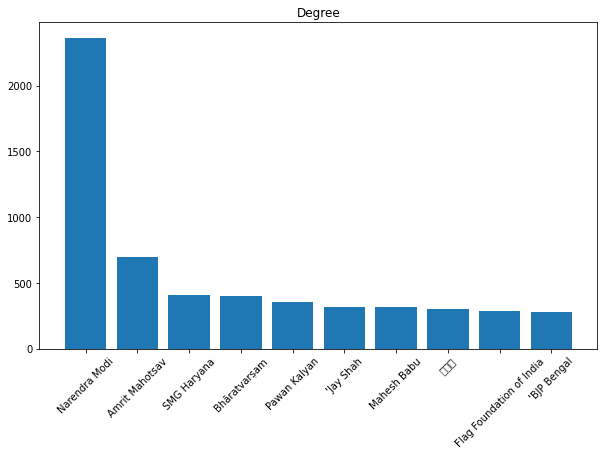

In [240]:
plot_metrics_bar(new_deg,"Degree")

### Betweeness Centrality

In [186]:
betweeness_centrality=sorted(nx.betweenness_centrality(G, normalized=True).items(), key=lambda x:x[1], reverse=True)
betweeness_centrality[0:10]

[('Narendra Modi', 0.2719441063378746),
 ("'Narendra Modi", 0.12962851973461867),
 ('RahulVerma1971', 0.10666475104271261),
 ("'Amrit Mahotsav", 0.061797591970728094),
 ('', 0.057153163011470054),
 ('parvind21502443', 0.050447004207093284),
 ('SMG Haryana', 0.03818510555677473),
 ('Bhāratvarṣam', 0.03743337261977944),
 ('nyk_budgam', 0.036536217278264484),
 ("'PMO India", 0.034248121854340736)]

In [248]:
new_bc=betweeness_centrality[0:20]
new_bc.append((new_bc[0][0],new_bc[0][1]+new_bc[1][1]))
del new_bc[0]
del new_bc[0]
del new_bc[2]
new_bc=sorted(new_bc,key=lambda x:x[1],reverse=True)
new_bc[:10]

[('Narendra Modi', 0.4015726260724932),
 ('RahulVerma1971', 0.10666475104271261),
 ("'Amrit Mahotsav", 0.061797591970728094),
 ('parvind21502443', 0.050447004207093284),
 ('SMG Haryana', 0.03818510555677473),
 ('Bhāratvarṣam', 0.03743337261977944),
 ('nyk_budgam', 0.036536217278264484),
 ("'PMO India", 0.034248121854340736),
 ("'Amit Shah", 0.03405811620330913),
 ("'Jay Shah", 0.03184570533465248)]

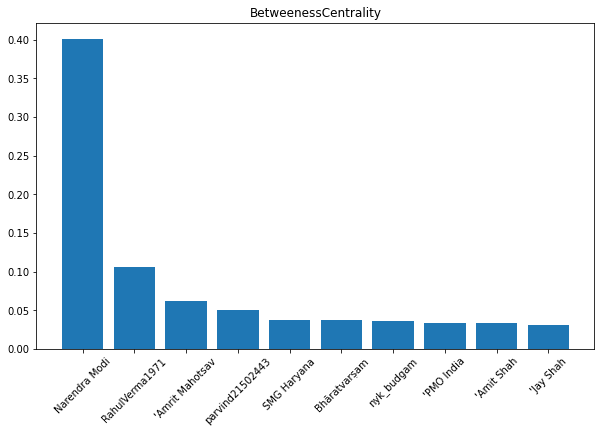

In [249]:
plot_metrics_bar(new_bc,"BetweenessCentrality")

## Visualizing

Wall time: 23min 1s


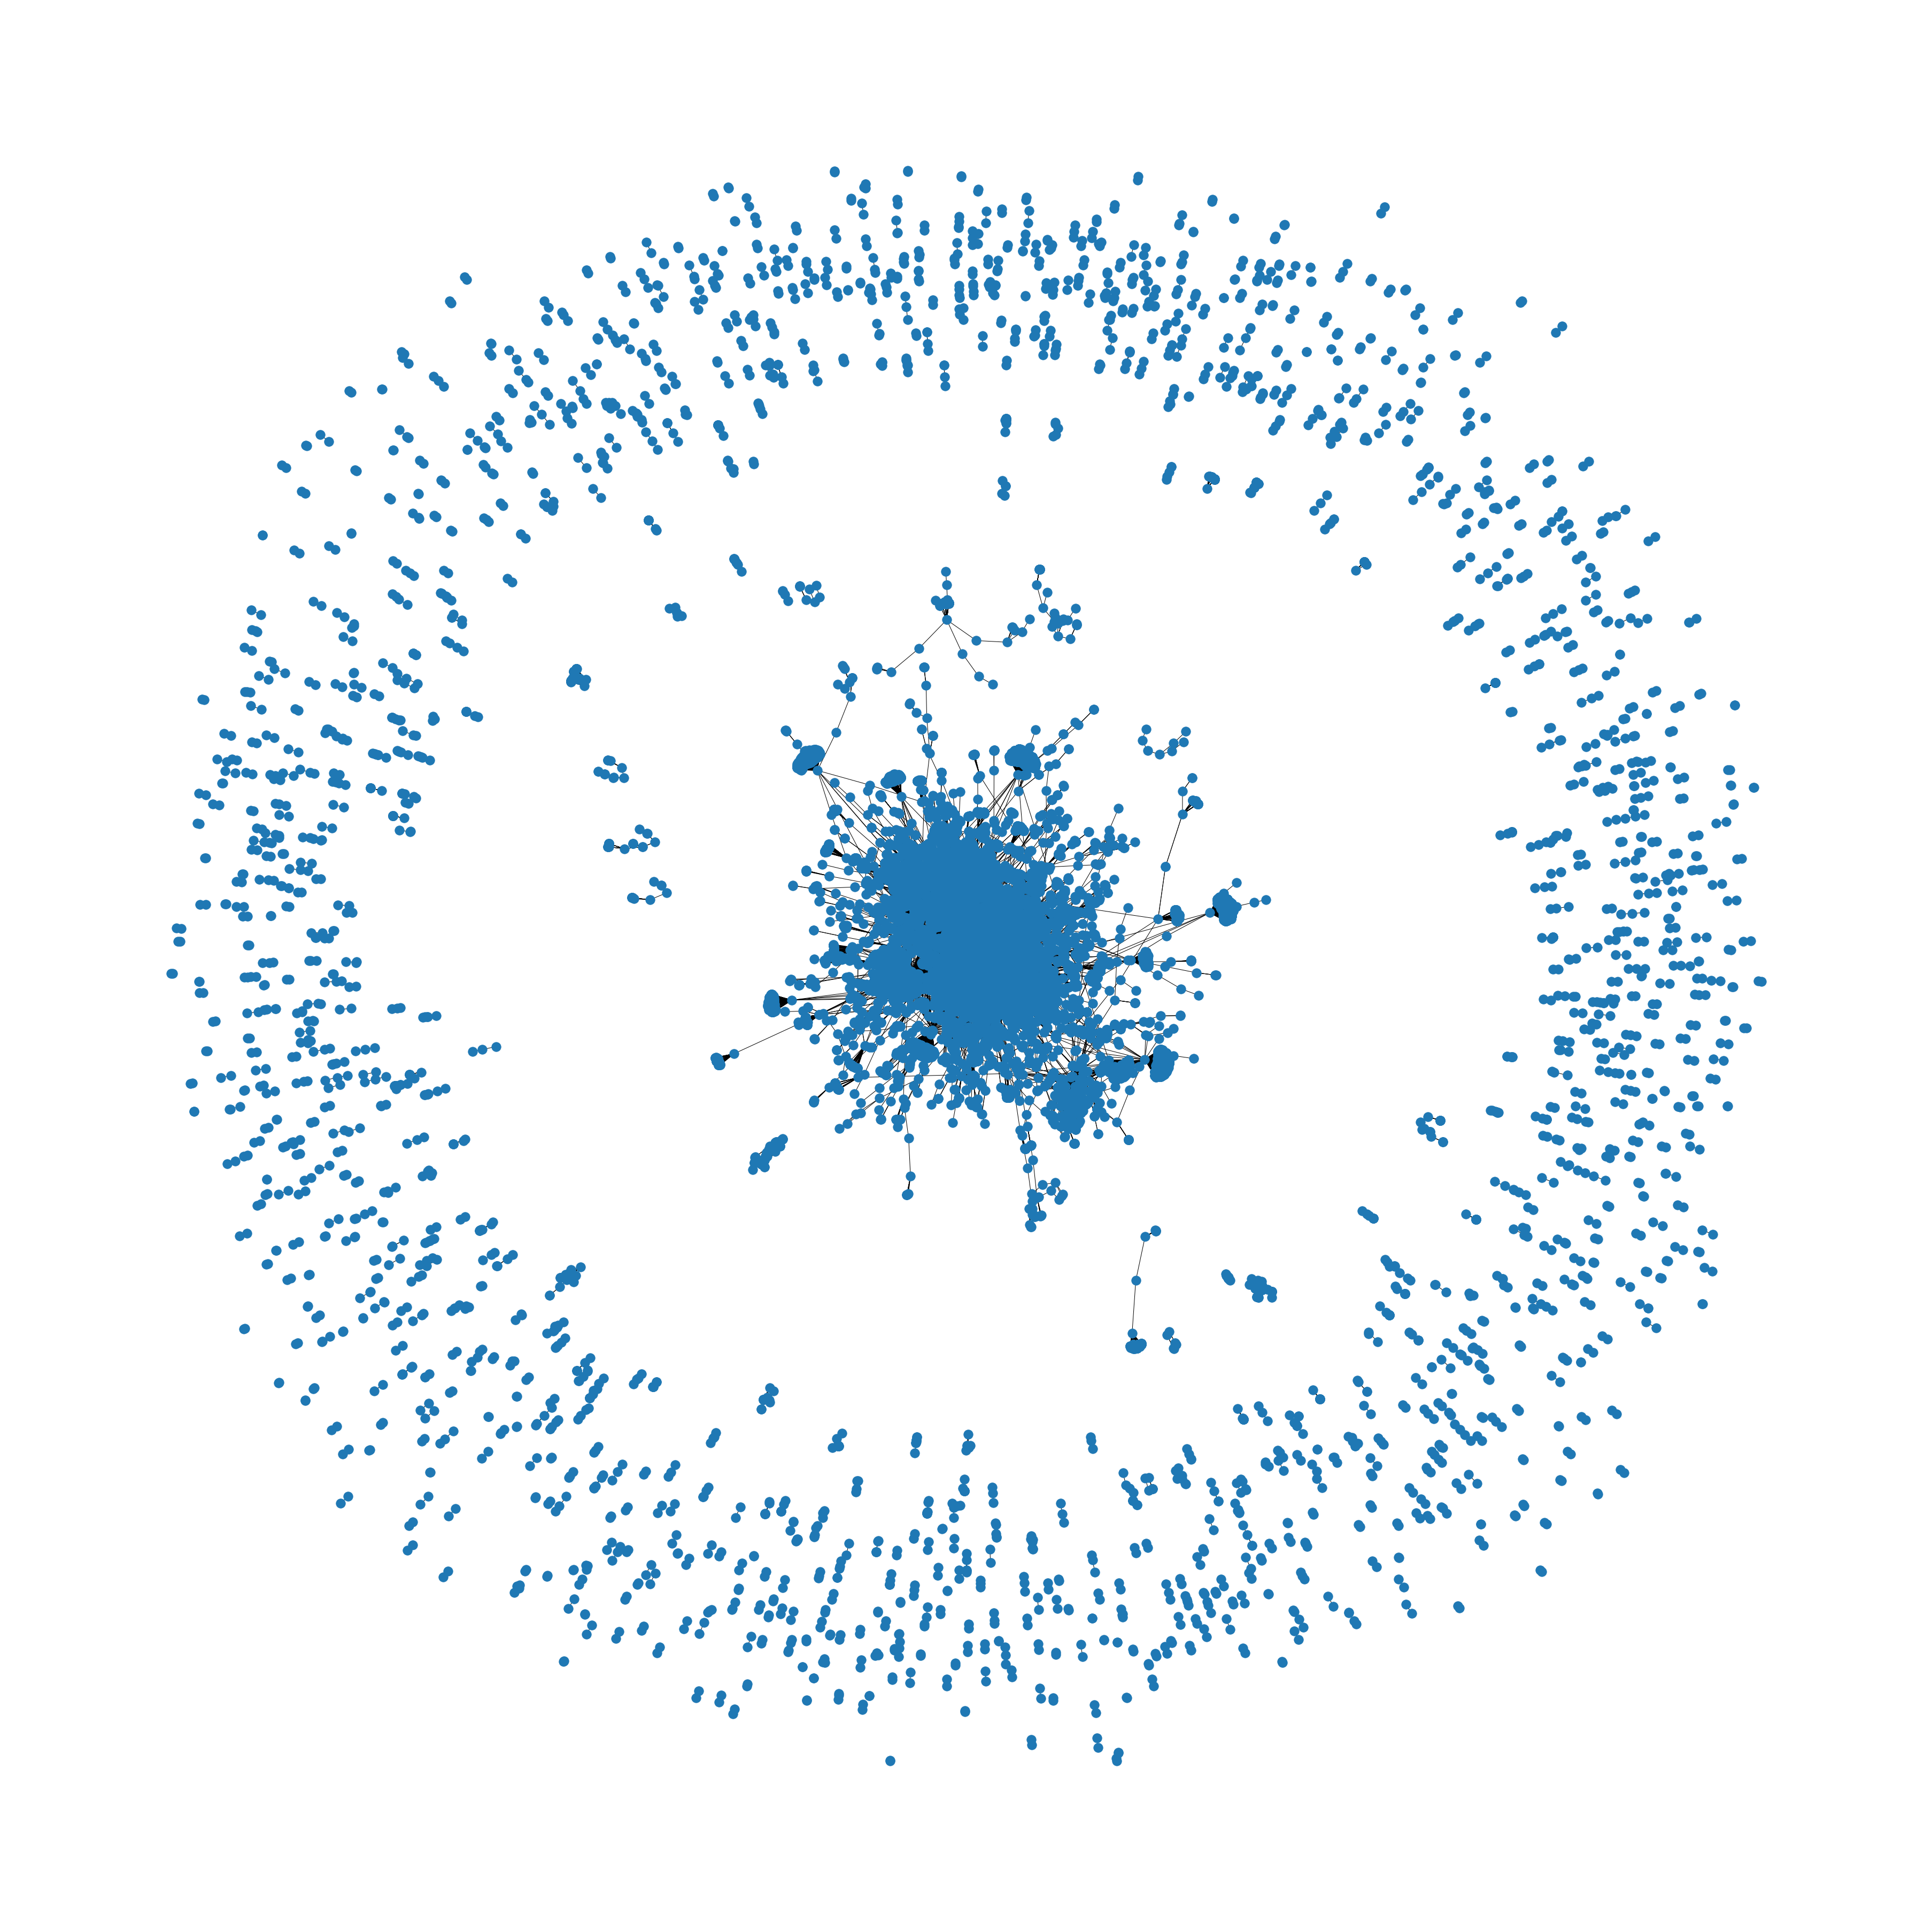

In [188]:
%%time
plt.figure(figsize=(50,50))
nx.draw(G)
plt.savefig("Twitter_NW_small.png")

In [189]:
nx.write_graphml_lxml(G,"twitter_hgt.graphml")

In [190]:
nx.write_gml(G, "test.gml")

### Degree Assortativity

In [191]:
deg_assortativity=nx.degree_assortativity_coefficient(G)

In [192]:
deg_assortativity

-0.12115644345814595

### Density

In [193]:
density=nx.density(G)
density

0.00018231909908305197

### Center

In [194]:
center=nx.center(G)

NetworkXError: Found infinite path length because the graph is not connected

### Diameter

In [ ]:
diameter=nx.diameter(G)

### Eccentricity

In [ ]:
ecc=nx.eccentricity(G)
ecc

### Maximum Independent Set

In [ ]:
max_clique=nx.max_clique(G)
max_clique

### Katz centrality

In [195]:
katz_centrality=sorted(nx.katz_centrality_numpy(G).items(),key=lambda x:x[1], reverse=True)
katz_centrality[0:10]

[('Smita Deshmukh🇮🇳', 0.29559894993533775),
 ("'NYKS India", 0.18283665721712825),
 ('NYK_Srinagar', 0.15114085200194743),
 ('NYK JALNA (Maharashtra)', 0.14606841361978368),
 ('Nehru Yuva Kendra Aurangabad (MH)', 0.14250136236019992),
 ('nyk_new', 0.1339063230351313),
 ('JammuNehru', 0.1049174301238092),
 ('MyGovIndia', 0.08741254877492377),
 ("'PMO India", 0.07752618850102796),
 ('ChamoliNyk', 0.06885608198915812)]

C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127470 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127475 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127470 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

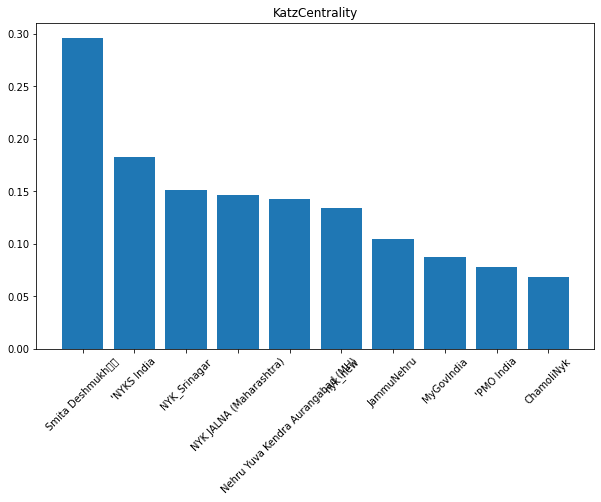

In [196]:
plot_metrics_bar(katz_centrality,"KatzCentrality")

### Eigen Vector centrality

In [197]:
e_vec_centrality=sorted(nx.eigenvector_centrality_numpy(G).items(),key=lambda x:x[1], reverse=True)
e_vec_centrality[0:10]

[('Narendra Modi', 0.7001883613741056),
 ("'Narendra Modi", 0.05704528761704631),
 ('nyk_budgam', 0.032510209277136846),
 ('YuvaSbs', 0.02646019500629352),
 ('MyGovIndia', 0.02487524192693288),
 ('nyks_doda', 0.024094482427687927),
 ('RahulVerma1971', 0.023336997372289087),
 ('Nykuttarkashi', 0.02217958380860648),
 ('nykspoonch', 0.021669018459361315),
 ("'BJP Bengal", 0.02157901669544532)]

In [250]:
new_ec=e_vec_centrality[0:20]
new_ec.append((new_ec[0][0],new_ec[0][1]+new_ec[1][1]))
del new_ec[0]
del new_ec[0]

new_ec=sorted(new_ec,key=lambda x:x[1],reverse=True)
new_ec[:10]

[('Narendra Modi', 0.7572336489911519),
 ('nyk_budgam', 0.032510209277136846),
 ('YuvaSbs', 0.02646019500629352),
 ('MyGovIndia', 0.02487524192693288),
 ('nyks_doda', 0.024094482427687927),
 ('RahulVerma1971', 0.023336997372289087),
 ('Nykuttarkashi', 0.02217958380860648),
 ('nykspoonch', 0.021669018459361315),
 ("'BJP Bengal", 0.02157901669544532),
 ('rdnss_kolkata', 0.02154586289011982)]

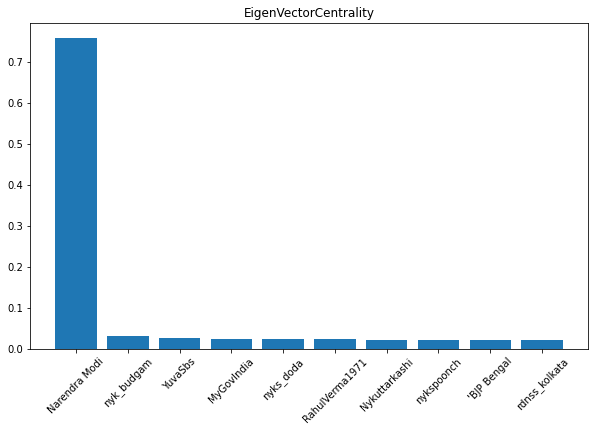

In [251]:
plot_metrics_bar(new_ec,"EigenVectorCentrality")

### Page Rank

In [199]:
pg_rank=sorted(nx.pagerank(G).items(),key=lambda x:x[1], reverse=True)
pg_rank[0:10]

[('Narendra Modi', 0.041862970853593605),
 ('', 0.01089655275666393),
 ('Bhāratvarṣam', 0.010526390227753734),
 ('SMG Haryana', 0.010009491462428343),
 ('Mahesh Babu', 0.00836718475083777),
 ('இசை', 0.008172126450837971),
 ('Flag Foundation of India', 0.0076773196956342665),
 ("'Narendra Modi", 0.0068512932096779266),
 ('Amrit Mahotsav', 0.006201880286451723),
 ("'Amrit Mahotsav", 0.0051113215847011255)]

In [258]:
new_pg=pg_rank[0:20]
new_pg.append((new_pg[0][0],new_pg[0][1]+new_pg[7][1]))
new_pg.append((new_pg[8][0],new_pg[8][1]+new_pg[9][1]))
del new_pg[0]
del new_pg[6]

new_pg=sorted(new_pg,key=lambda x:x[1],reverse=True)
new_pg[:10]

del new_pg[2]
del new_pg[7]
del new_pg[7]
del new_pg[8]
new_pg[:10]

[('Narendra Modi', 0.048714264063271534),
 ('Amrit Mahotsav', 0.01131320187115285),
 ('Bhāratvarṣam', 0.010526390227753734),
 ('SMG Haryana', 0.010009491462428343),
 ('Mahesh Babu', 0.00836718475083777),
 ('இசை', 0.008172126450837971),
 ('Flag Foundation of India', 0.0076773196956342665),
 ('Pawan Kalyan', 0.0050693374877375545),
 ('Pralhad Joshi', 0.00443946771414251),
 ('Blue Chip', 0.003928647705775135)]

C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2951 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2970 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Gly

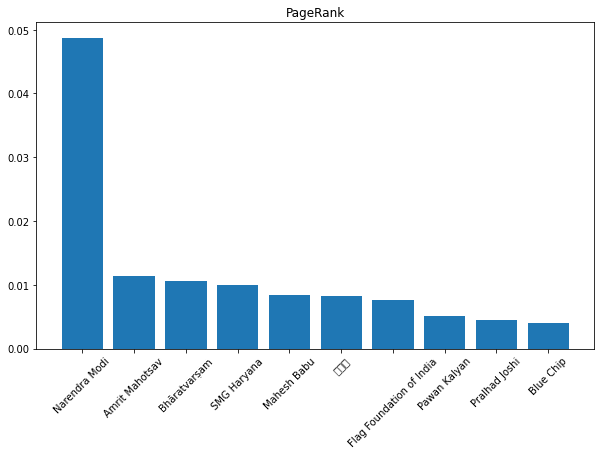

In [259]:
plot_metrics_bar(new_pg,"PageRank")

### Wordcloud

In [201]:
from wordcloud import WordCloud

In [202]:
text = " ".join(tweet.split()[1] for tweet in tweet_df.Tweet)

In [203]:
import re
regex = re.compile('[^\sa-zA-Z0-9]')

In [204]:
new_text=regex.sub('', text)
print(len(new_text))

235154


In [205]:
len(text)

286959

In [206]:
text_arr=new_text.split(' ')
print(len(text_arr))
for i,text in enumerate(text_arr):
    if len(text)<1:
        text_arr.pop(i)
print(len(text_arr))
unique, counts = np.unique(text_arr, return_counts=True)

updated_text=" ".join(text_arr)

35947
29907


In [264]:
word_count_df=pd.DataFrame({
    'word':unique,
    'count':[int(count) for count in counts]
})
word_count_df=word_count_df.sort_values('count')
word_count_df.tail(25)

,word,count
941,Nyksindia,198
548,Happy,203
498,Glimpses,228
120,AmritMahotsav,256
888,NYK,263
1361,Tuned,277
1328,Tiranga,278
377,Display,289
64,A,300
44,38000,304


In [208]:
word_cloud = WordCloud(width=1400, height=800,collocations = False, background_color = 'white').generate(updated_text)

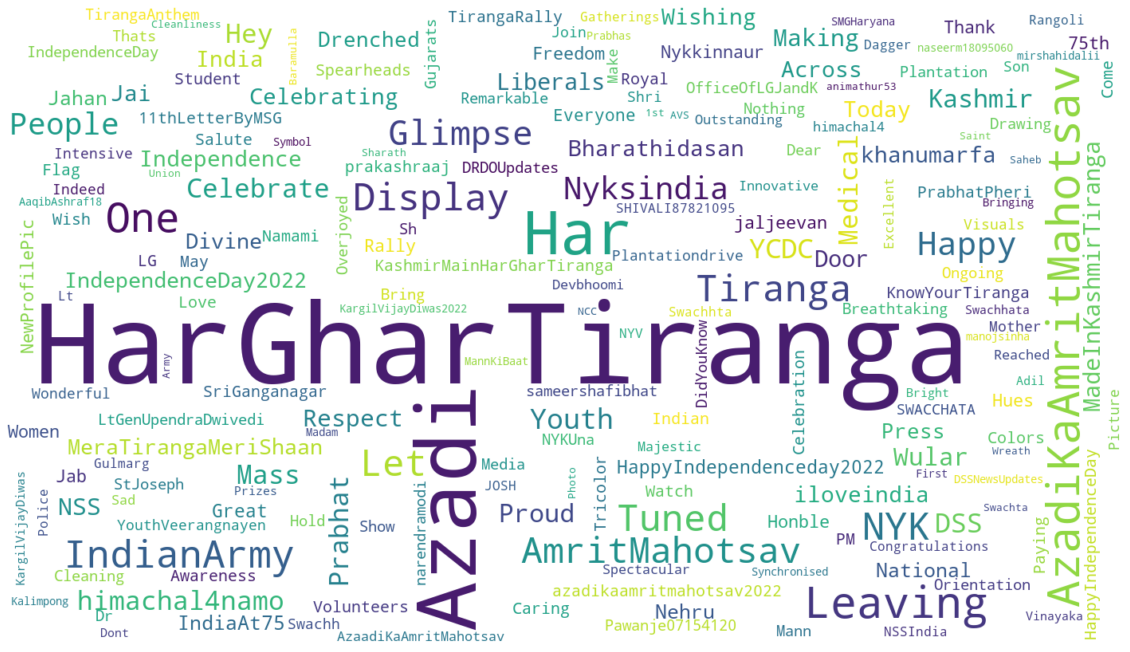

In [209]:
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("word_cloud.png")
plt.show()